<a href="https://colab.research.google.com/github/DavidEmeryUofC/DavidEmeryUofC/blob/main/FE1_for_MineralPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply FE and plot results¶
Input well information, standardize log names, scale, and execute ML model.

Written by [David Emery](https://www.linkedin.com/in/david-emery-54659a3a/)

In [ ]:
# To supress warnings and deprecated messages
import warnings
warnings.filterwarnings("ignore")

# Core routines
import numpy as np
import pandas as pd
import time

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#from pputilities import *

## Import log data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# Setting up pointer to my google drive 
#filename = input('Enter the input.csv file name ')
#if filename == '':
MYPATH = "/content/gdrive/MyDrive/LAS/"

Mounted at /content/gdrive


In [ ]:
filename = MYPATH + 'NORTHSEAmergedData.csv'
data = pd.read_csv(filename, delimiter=";")

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH,4275719.0,2180.197763,1026.103180,8.015202e+01,1384.500122,2085.740967,2898.164887,5456.139648
TVD,1159736.0,-2138.527143,970.942584,-5.395563e+03,-2811.501892,-2042.784973,-1391.865662,-111.085991
BS,1936775.0,160.421751,1833.722967,5.843999e+00,8.500000,12.250001,12.250001,40300.082031
CALI,4064765.0,12.269407,4.464691,-7.452000e+00,8.652000,12.372000,15.434000,33.359200
GR,4274776.0,67.084000,31.677363,4.294872e-03,45.063786,64.205055,85.537018,299.972839
RDEP,4208875.0,27.142172,414.423003,5.078961e-04,0.919998,1.451000,2.552062,74508.562500
RMED,4057380.0,9.236011,194.574932,3.423300e-04,0.914137,1.455303,2.652491,75239.320313
RSHA,2715280.0,17.258154,392.760266,1.993600e-05,0.895834,1.420159,2.761847,48476.605469
NPHI,2530476.0,0.323302,0.125542,1.952000e-07,0.236200,0.322600,0.415616,0.700000
RHOB,3792970.0,2.277228,0.246287,1.011000e+00,2.085881,2.299509,2.482100,3.197000


## Classification histogram displaying % coverage (classification_hist)

In [ ]:
def classification_hist (Data,Classification_keys,Title=""):
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  counts = Data.value_counts()
  names = []
  percentage = []
  N = Data.shape[0]
  for item in counts.iteritems():
    names.append(Classification_keys[item[0]])
    percentage.append(float(item[1])/N*100)
  fig, ax = plt.subplots(1, 1, figsize=(10, 5))
  ax.bar(x = np.arange(len(names)), height=percentage)
  ax.set_xticklabels(names, rotation=45)
  ax.set_xticks(np.arange(len(names)))
  ax.set_ylabel('Category (%)');
  ax.set_title(Title + ' Classification split (%)'); 

In [ ]:
lithology_keys = {30000: 'Sandstone', 65030: 'SS-SH', 65000: 'Shale', 80000: 'Marl',
     74000: 'Dolomite', 70000: 'Limestone', 70032: 'Chalk', 88000: 'Halite', 
    86000: 'Anhydrite', 99000: 'Tuff', 90000: 'Coal', 93000: 'Basement'}   

Lithology distribution:

Text(0, 0.5, 'Lithology presence (\\%)')

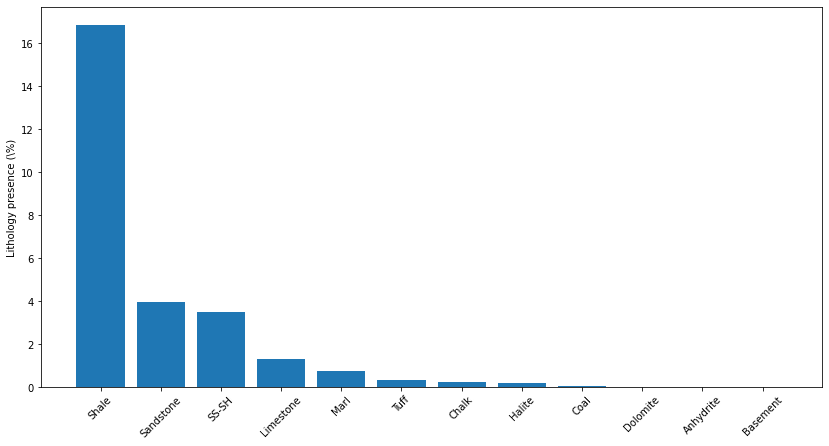

In [ ]:
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.iteritems():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x = np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

In [ ]:
lithology_numbers = {30000: 1,
                 65030: 3,
                 65000: 2,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

data["Facies"] = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].map(lithology_numbers)

In [ ]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 70000: 'Limestone',
                 99000: 'Tuff',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 70032: 'Chalk',
                 74000: 'Dolomite',
                 90000: 'Coal',
                 93000: 'Basement'}

data["Facies_Names"] = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].map(lithology_keys)
data.head()

,WELL,DEPTH,TVD,BS,CALI,GR,RDEP,RMED,RSHA,NPHI,...,DTS,PEF,SP,GROUP,FORMATION,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITHOLOGY_GEOLINK,Facies,Facies_Names
0,15/9-12,493.493134,NaN,NaN,19.406000,62.406261,1.574993,1.546029,1.546029,NaN,...,NaN,NaN,0.694700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-12,493.645538,NaN,NaN,19.406000,62.629055,1.569011,1.570030,1.570030,NaN,...,NaN,NaN,0.445339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-12,493.797943,NaN,NaN,19.406000,62.629055,1.578010,1.594994,1.594994,NaN,...,NaN,NaN,0.727901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-12,493.950348,NaN,NaN,19.452999,62.685898,1.586024,1.589930,1.589930,NaN,...,NaN,NaN,1.474898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-12,494.102722,NaN,NaN,19.452999,62.876503,1.603011,1.540016,1.540016,NaN,...,NaN,NaN,-0.023000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Setup default colour and plot size

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
density_colors = ['white', 'lightgrey', 'skyblue', 'green', 'yellow', 'gold', 'darkorange', 'red', 'DarkRed', 'violet']
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('wbgr', density_colors))
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('wbgr_trans', density_colors, gamma=np.linspace(1, 0, 256)))

# Colour map for displaying GR from yellow to grey 
gammaray_colors = ['salmon','yellow', 'lightgreen','lightgrey', 'silver','gray','slategrey']
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('gr_color', gammaray_colors))

# Colour map for highlighting confusion matrix
confusion_colors = ['white', 'yellow', 'green', 'skyblue', 'blue']
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('wygb', confusion_colors))

# Default figure size for use in Powerpoint
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 144
plt.tight_layout()

# Default font size
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<Figure size 1440x1008 with 0 Axes>

##Routine for crossplotting two curves displaying density of the points (log_crossplot)

In [ ]:
def log_crossplot (x,y,nameX,nameY,cMap1='wbgr_trans',order=2, lplot=False, intercept=0.0, slope=1.0, pow=1, scaler=1):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt   
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    # Remove nan point from input
    df = pd.DataFrame({nameX:x,nameY:y})
    df.dropna(axis=0,inplace=True)
    num_points = len(df)
    lineP = True
    
    # Create density plot
    heatmap, xedges, yedges = np.histogram2d(df[nameX], df[nameY], bins=250)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    # Create trend line for data
    Xmin = np.percentile(df[nameX],2.5)
    Xmax = np.percentile(df[nameX],98.5)
    Xline = np.arange(Xmin,Xmax,(Xmax-Xmin)/100)
    Zline = intercept + slope*np.power((scaler * Xline),pow)
    
    model = LinearRegression()
    X = df[nameX].to_numpy()
    X = X.reshape(-1,1)
    Y = df[nameY].to_numpy()
    Y = Y.reshape(-1,1)
    
    # only will display relationships upto the 4th order 
    if order >= 2 :
        poly_reg = PolynomialFeatures(degree = order)
        X_poly = poly_reg.fit_transform(X,Y)
        model.fit(X_poly,Y)
        Yline = model.predict(poly_reg.fit_transform(Xline.reshape(-1,1)))
        r2 = model.score(X_poly,Y)
        intercept = model.intercept_
        parm = model.coef_
        if order == 2:
            ctext = str(str(round(float(intercept),2)) + ' + ' + str(round(float(parm[:,1]),3))
                    + '*X + ' +str(round(float(parm[:,2]),5)) + '*X2  r2=' + str(round(float(r2),2)))
        elif order == 3:
            ctext = str(str(round(float(intercept),2)) + ' + ' + str(round(float(parm[:,1]),3))
                    + '*X + ' +str(round(float(parm[:,2]),5)) + '*X2 + '
                    +  str(round(float(parm[:,3]),7)) + '*X3  r2=' + str(round(float(r2),2)))
        elif order == 4: 
            ctext = str(str(round(float(intercept),2)) + ' + ' + str(round(float(parm[:,1]),3))
                    + '*X + ' +str(round(float(parm[:,2]),5)) + '*X2 + '
                    + str(round(float(parm[:,3]),7)) + '*X3 + ' 
                    + str(round(float(parm[:,4]),9)) + '*X4  r2=' + str(round(float(r2),2)))
    elif order == 1:
        model.fit(X,Y)
        Yline = model.predict(Xline.reshape(-1,1))
        r2 = model.score(X,Y)
        intercept = model.intercept_
        parm = model.coef_
        ctext = str('intercept ' + str(round(float(intercept),2)) + ' slope ' +
                    str(round(float(parm),4)) + '  r2=' + str(round(float(r2),2)))
    else :
        lineP = False
        
    plt.figure(figsize = (10,7))
    plt.title("Crossplot of " + nameX + ' and ' + nameY, fontsize=16)
    plt.grid(alpha=0.5)
    plt.xlim([np.percentile(df[nameX],0.01), np.percentile(df[nameX],99.9)])
    plt.ylim([np.percentile(df[nameY],0.01), np.percentile(df[nameY],99.9)])    
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap=cMap1, aspect='auto')
    if(lplot):
        plt.plot(Xline,Zline, c='blue', linestyle='dashed') 
    if(lineP):
        plt.plot(Xline,Yline, c='red')
        plt.text(np.percentile(df[nameX],10),np.percentile(df[nameY],1),ctext)
    plt.xlabel(nameX)
    plt.ylabel(nameY)

    plt.show()


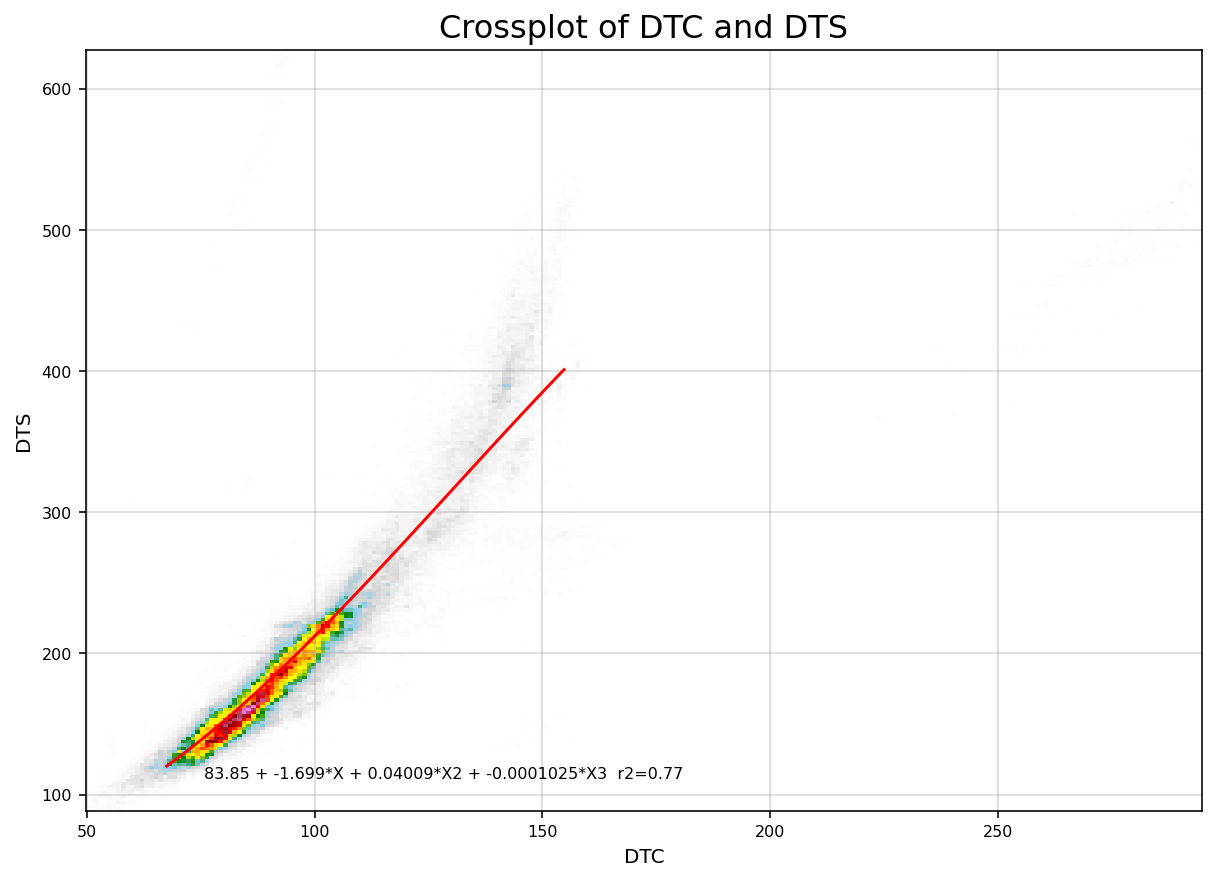

In [ ]:
nameX = 'DTC'
nameY = 'DTS'
log_crossplot(data[nameX],data[nameY],nameX,nameY,order=3)
#log_crossplot(data[nameX],data[nameY],nameX,nameY,cMap1='wbgr_trans',order=2, lplot=True, intercept=0.0, slope=1.0, pow=1, scaler=1)

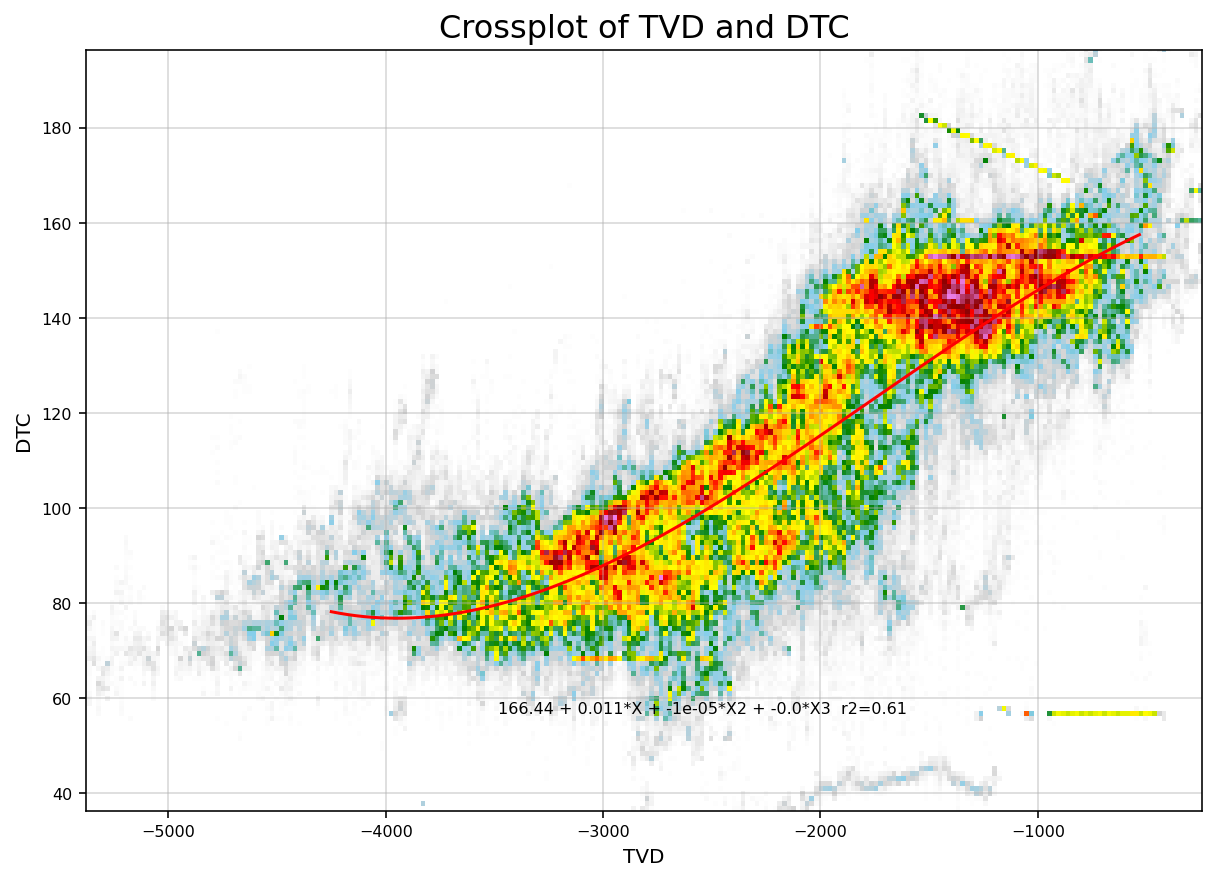

In [ ]:
nameX = 'TVD'
nameY = 'DTC'
log_crossplot(data[nameX],data[nameY],nameX,nameY,order=3)
#log_crossplot(data[nameX],data[nameY],nameX,nameY,cMap1='wbgr_trans',order=2, lplot=True, intercept=0.0, slope=1.0, pow=1, scaler=1)

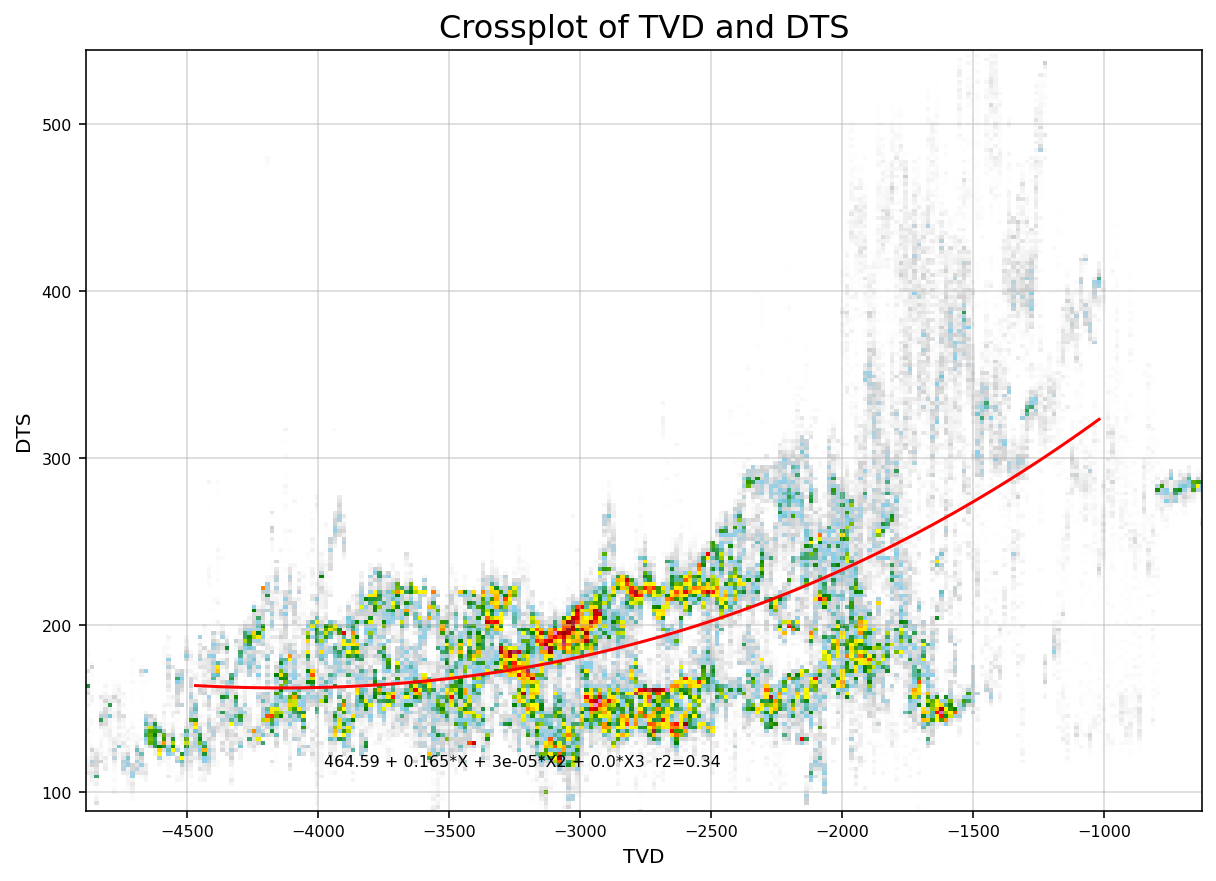

In [ ]:
nameX = 'TVD'
nameY = 'DTS'
log_crossplot(data[nameX],data[nameY],nameX,nameY,order=3)
#log_crossplot(data[nameX],data[nameY],nameX,nameY,cMap1='wbgr_trans',order=2, lplot=True, intercept=0.0, slope=1.0, pow=1, scaler=1)

In [ ]:
data.head()

,WELL,DEPTH,TVD,BS,CALI,GR,RDEP,RMED,RSHA,NPHI,...,DTS,PEF,SP,GROUP,FORMATION,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITHOLOGY_GEOLINK,Facies,Facies_Names
0,15/9-12,493.493134,NaN,NaN,19.406000,62.406261,1.574993,1.546029,1.546029,NaN,...,NaN,NaN,0.694700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-12,493.645538,NaN,NaN,19.406000,62.629055,1.569011,1.570030,1.570030,NaN,...,NaN,NaN,0.445339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-12,493.797943,NaN,NaN,19.406000,62.629055,1.578010,1.594994,1.594994,NaN,...,NaN,NaN,0.727901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-12,493.950348,NaN,NaN,19.452999,62.685898,1.586024,1.589930,1.589930,NaN,...,NaN,NaN,1.474898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-12,494.102722,NaN,NaN,19.452999,62.876503,1.603011,1.540016,1.540016,NaN,...,NaN,NaN,-0.023000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Set -999.25 to nan 

In [ ]:
data[data == -999.25] = np.nan

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPTH,4275719.0,2180.197763,1026.103180,8.015202e+01,1384.500122,2085.740967,2898.164887,5456.139648
TVD,1159736.0,-2138.527143,970.942584,-5.395563e+03,-2811.501892,-2042.784973,-1391.865662,-111.085991
BS,1936775.0,160.421751,1833.722967,5.843999e+00,8.500000,12.250001,12.250001,40300.082031
CALI,4064765.0,12.269407,4.464691,-7.452000e+00,8.652000,12.372000,15.434000,33.359200
GR,4274776.0,67.084000,31.677363,4.294872e-03,45.063786,64.205055,85.537018,299.972839
RDEP,4208875.0,27.142172,414.423003,5.078961e-04,0.919998,1.451000,2.552062,74508.562500
RMED,4057380.0,9.236011,194.574932,3.423300e-04,0.914137,1.455303,2.652491,75239.320313
RSHA,2715280.0,17.258154,392.760266,1.993600e-05,0.895834,1.420159,2.761847,48476.605469
NPHI,2530476.0,0.323302,0.125542,1.952000e-07,0.236200,0.322600,0.415616,0.700000
RHOB,3792970.0,2.277228,0.246287,1.011000e+00,2.085881,2.299509,2.482100,3.197000


## Create missing logs

In [ ]:
LOGS = ['WELL','DEPTH','CONFIDENCE','BS','CALI',
        'GR','RDEP','RMED','RSHA','NPHI','RHOB','DTC','DTS','PEF','SP']
# Determine the logs contained in the file
for item in LOGS:
  if not item in data.columns:
    print('creating ' + item) 
    data[item] = np.nan

data.WELL[data.WELL.isnull()] = 'unknown'
data.CONFIDENCE[data.CONFIDENCE.isnull()] = 1

creating CONFIDENCE


### Determine the number of wells in the file

In [ ]:
Wells = data.WELL.unique()
print(f"There are {len(Wells)} wells in the file")

There are 208 wells in the file


###De-spike using Medium filter of GR, DTC, DTS, NPHI, RHOB, PEF

In [ ]:
from scipy.signal import medfilt
FILTER = ['GR','CALI','DTC','DTS','NPHI','RHOB','PEF']
for item in FILTER:
  print('Filtering ',item)
  for well in Wells:
    data[item][data[item][data.WELL == well].index] = medfilt(data[item][data.WELL == well], 7)


Filtering  GR
Filtering  CALI
Filtering  DTC
Filtering  DTS
Filtering  NPHI
Filtering  RHOB
Filtering  PEF


###Check Log units

In [ ]:
for well in Wells:
    # Scale CALI value to inches
    value = np.nanmedian(data[data.WELL == well].CALI)
    if value > 50:
        data.CALI[data[data.WELL == well].CALI.index] = (data[data.WELL == well].CALI)*0.0393701
    
    # Scale BS value to inches
    value = np.nanmedian(data[data.WELL == well].BS)
    if value > 50:
        data.BS[data[data.WELL == well].BS.index] = (data[data.WELL == well].BS)*0.0393701

    # Scale DTC into ft/us
    value = np.nanmedian(data[data.WELL == well].DTC)
    if value > 200:
        data.DTC[data[data.WELL == well].DTC.index] = (data[data.WELL == well].DTC)/3.2808

    # Scale DTS into ft/us
    value = np.nanmedian(data[data.WELL == well].DTS)
    if value > 400:
        data.DTS[data[data.WELL == well].DTS.index] = (data[data.WELL == well].DTS)/3.2808
         
    # Scale density value to g/cc
    value = np.nanmedian(data[data.WELL == well].RHOB)
    while value > 10:
        data.RHOB[data[data.WELL == well].RHOB.index] = (data[data.WELL == well].RHOB)/10
        value = np.nanmedian(data[data.WELL == well].RHOB)   
    
    # Scale NPHI value to v/v
    value = np.nanmedian(data[data.WELL == well].NPHI)
    while value > 1:
        data.NPHI[data[data.WELL == well].NPHI.index] = (data[data.WELL == well].NPHI)/10
        value = np.nanmedian(data[data.WELL == well].NPHI)
    
    # Make sure PEF values are between 0-10
    valuemed = np.nanmedian(data[data.WELL == well].PEF)
    valuestd = np.nanstd(data[data.WELL == well].PEF)
    # shift median to zero
    data.PEF[data[data.WELL == well].PEF.index] = (data[data.WELL == well].PEF) - valuemed
    # change std to 1
    data.PEF[data[data.WELL == well].PEF.index] = (data[data.WELL == well].PEF) / valuestd
    # shift median back to medium
    data.PEF[data[data.WELL == well].PEF.index] = (data[data.WELL == well].PEF) + valuemed
         


Trim the units outside of sedimentary rock range

In [ ]:
data.GR[data.GR >= 300   ] = 300     # GR 150 for a 100% clay
data.GR[data.GR <= 0     ] = 0       # GR <0 not possible
data.RDEP[data.RDEP >= 100000] = np.nan  # Should not exist if correctly log scaled
data.RDEP[data.RDEP <= 0.00001] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RMED[data.RMED >= 100000] = np.nan  # Should not exist if correctly log scaled
data.RMED[data.RMED <= 0.00001] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RSHA[data.RSHA >= 100000] = np.nan  # Should not exist if correctly log scaled
data.RSHA[data.RSHA <= 0.00001] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RHOB[data.RHOB >= 3.2 ] = np.nan  # Density above 4 unlikely to exist in sedimentary rocks
data.RHOB[data.RHOB <= 1 ] = np.nan  # Density less than water should not exist
data.PEF[data.PEF >= 8   ] = np.nan  # Should not exist if correctly scaled
data.PEF[data.PEF <= 0.1 ] = np.nan  # Should not exist if correctly scaled
data.DTC[data.DTC >= 300 ] = np.nan  # Should not exist as 250 = 1220 m/sec < water
data.DTC[data.DTC <= 35  ] = np.nan  # Should not exist as 35 = 8700 m/sec > all sedimentary rocks
data.DTS[data.DTS >= 650 ] = np.nan  # Unlikely shear velocity < 500 m/s
data.DTS[data.DTS <= 65  ] = np.nan  # Unlikely shear velocity > 5000 m/s   
data.NPHI[data.NPHI >= 0.7 ] = np.nan  # Unlikely porosity reading even for shales
data.NPHI[data.NPHI <= 0  ] = np.nan  # Physically impossible porosity 

Display the histogram after unit editting

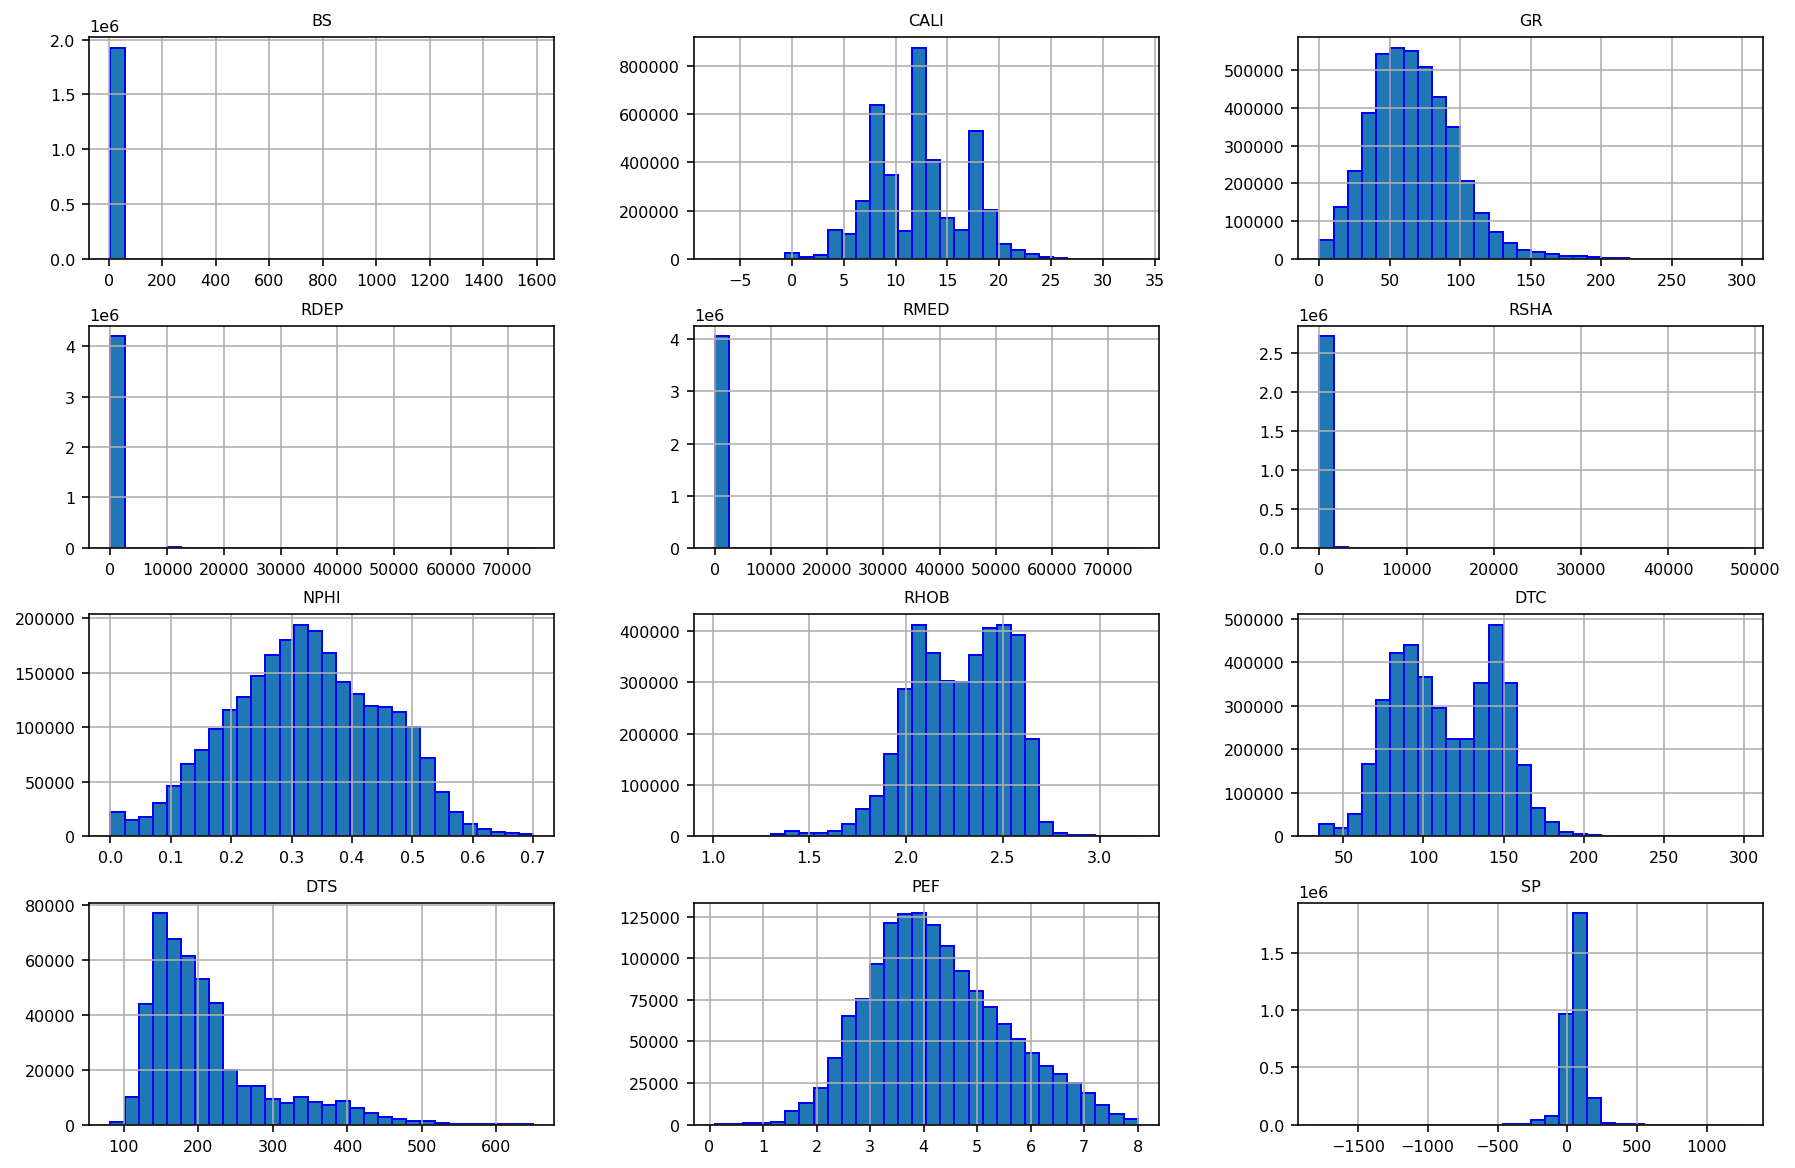

In [ ]:
Features = ['BS','CALI','GR','RDEP','RMED','RSHA','NPHI','RHOB','DTC','DTS','PEF','SP']
data[Features].hist(bins=30,figsize=(15,10),edgecolor='b')
plt.show()

###Check for extreme values and flag points

In [ ]:
data['BAD'] = 0
data.BAD[data.GR[data.GR >= 300   ].index] += 1
data.BAD[data.GR[data.GR <= 0   ].index] += 1
data.BAD[data.RDEP[data.RDEP >= 1000000].index] += 1
data.BAD[data.RDEP[data.RDEP <= 0.00001].index] += 1
data.BAD[data.RMED[data.RMED >= 1000000].index] += 1
data.BAD[data.RMED[data.RMED <= 0.00001].index] += 1
data.BAD[data.NPHI[data.NPHI >= 0.8 ].index] += 1
data.BAD[data.NPHI[data.NPHI <= -0.1  ].index] += 1
data.BAD[data.RHOB[data.RHOB >= 3.2 ].index] += 1
data.BAD[data.RHOB[data.RHOB <= 1 ].index] += 1
data.BAD[data.DTC[data.DTC >= 300 ].index] += 1
data.BAD[data.DTC[data.DTC <= 35  ].index] += 1
data.BAD[data.DTS[data.DTS >= 650 ].index] += 1
data.BAD[data.DTS[data.DTS <= 65  ].index] += 1 
data.BAD.sum()

0

Create Vp & Vs from DTC & DTS

In [ ]:
#if not 'Vp' in data.columns:
data['Vp'] = 1000000 / (3.2808 * data['DTC'])
#if not 'Vs' in data.columns:
data['Vs'] = 1000000 / (3.2808 * data['DTS'])

In [ ]:
data.GR[data.GR >= 300   ] = 300     # GR 150 for a 100% clay
data.GR[data.GR <= 0     ] = 0       # GR <0 not possible
data.RDEP[data.RDEP >= 100000] = np.nan  # Should not exist if correctly log scaled
data.RDEP[data.RDEP <= 0.00001] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RMED[data.RMED >= 100000] = np.nan  # Should not exist if correctly log scaled
data.RMED[data.RMED <= 0.00001] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RSHA[data.RSHA >= 100000] = np.nan  # Should not exist if correctly log scaled
data.RSHA[data.RSHA <= 0.00001] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RHOB[data.RHOB >= 3.2 ] = np.nan  # Density above 4 unlikely to exist in sedimentary rocks
data.RHOB[data.RHOB <= 1 ] = np.nan  # Density less than water should not exist
data.PEF[data.PEF >= 8   ] = np.nan  # Should not exist if correctly scaled
data.PEF[data.PEF <= 0.1 ] = np.nan  # Should not exist if correctly scaled
data.DTC[data.DTC >= 300 ] = np.nan  # Should not exist as 250 = 1220 m/sec < water
data.DTC[data.DTC <= 35  ] = np.nan  # Should not exist as 35 = 8700 m/sec > all sedimentary rocks
data.DTS[data.DTS >= 650 ] = np.nan  # Unlikely shear velocity < 500 m/s
data.DTS[data.DTS <= 65  ] = np.nan  # Unlikely shear velocity > 5000 m/s   
data.Vp[data.Vp >= 7000 ] = np.nan  # Should not exist as 250 = 1220 m/sec < water
data.Vp[data.Vp <= 1450  ] = np.nan  # Should not exist as 35 = 8700 m/sec > all sedimentary rocks
data.Vs[data.Vs >= 3500 ] = np.nan  # Unlikely shear velocity < 500 m/s
data.Vs[data.Vs <= 300  ] = np.nan  # Unlikely shear velocity > 5000 m/s       
data.NPHI[data.NPHI >= 0.7 ] = np.nan  # Unlikely porosity reading even for shales
data.NPHI[data.NPHI <= 0  ] = np.nan  # Physically impossible porosity 

###Take the log of the resistivity

In [ ]:
data['RDEP'] = np.log10(data['RDEP'])
data['RMED'] = np.log10(data['RMED'])
data['RSHA'] = np.log10(data['RSHA'])

##Trend Estimation

Routine for estimating trend, note LinearRegression can't handle nan values so the first item is to remove points containing a nan.

In [ ]:
# Calculate trend line
def dptrend(x,y,order):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt    
    
    # Remove nan point from input
    df = pd.DataFrame({"X":x,"Y":y})
    df.dropna(axis=0,inplace=True)
        
    model = LinearRegression(fit_intercept=True)
    X = df.X.to_numpy()
    X = X.reshape(-1,1)
    Y = df.Y.to_numpy()
    Y = Y.reshape(-1,1)
    
    if order >= 2 :
        poly_reg = PolynomialFeatures(degree = order)
        X_poly = poly_reg.fit_transform(X,Y)
        model.fit(X_poly,Y)
        Ypred = model.predict(X_poly)
        r2 = model.score(X_poly,Y)
        
    else :
        model.fit(X,Y)
        Ypred = model.predict(X)
        r2 = model.score(X,Y)
        
    intercept = model.intercept_
    parm = model.coef_

    return (intercept, parm, r2) 

The depth trend should be in TVD not MD but as not all wells include a TVD depth estimate from the wells that do.

In [ ]:
parm = dptrend(data.DEPTH,data.TVD,1)
print('MD to Z: intercept',round(float(parm[0]),2),'slope',
      round(float(parm[1]),4),'r2',round(parm[2],3))
data.TVD[data.TVD.isnull()]  = data.DEPTH[data.TVD.isnull()] * float(parm[1]) + float(parm[0])

MD to Z: intercept -18.36 slope -0.9691 r2 0.99


###Estimate TVD from MD

In [ ]:
data.TVD[data.TVD.isnull()] = (data.DEPTH - 18.4) * (-0.969)  # using TVD as negative

In [ ]:
data.dropna(subset=['TVD'],inplace=True)

Estimate the trend for the standard Petrophysial logs

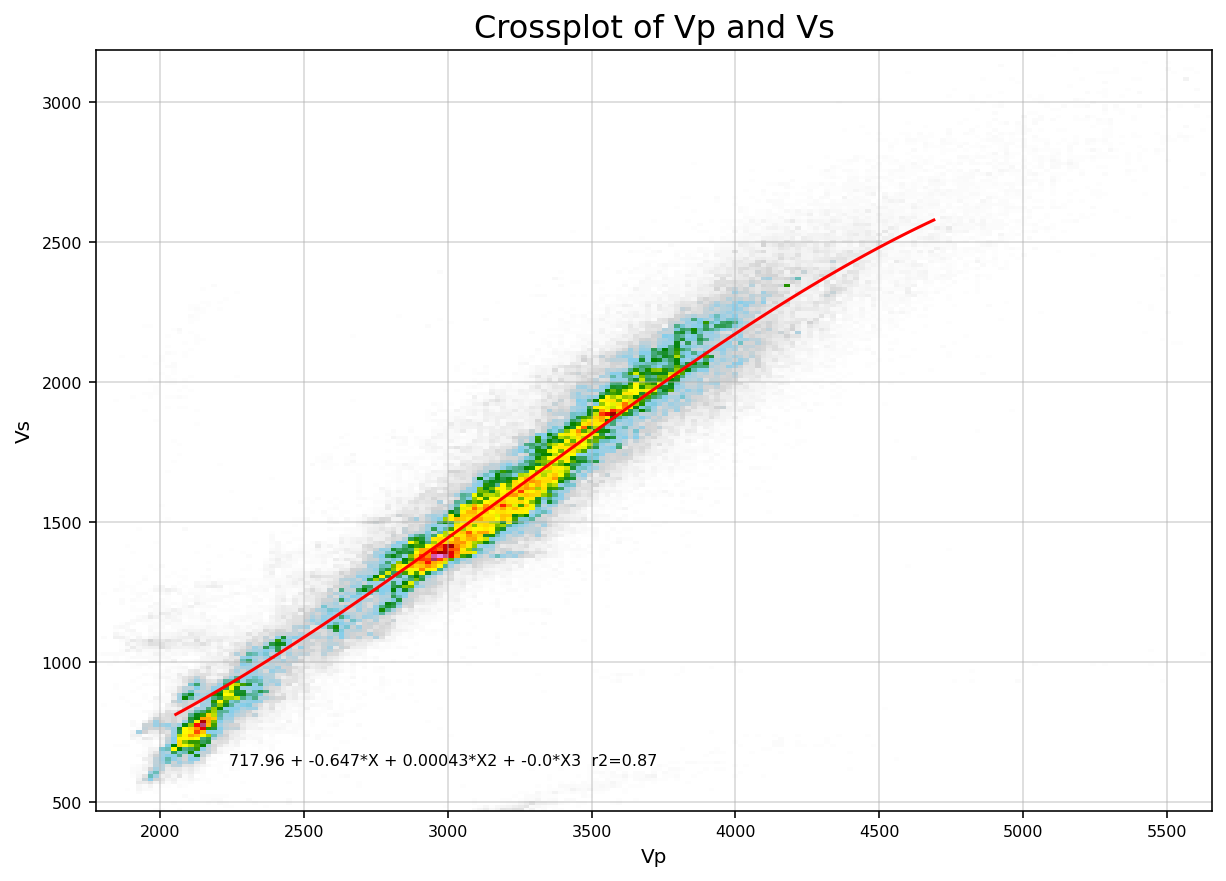

In [ ]:
nameX = 'Vp'
nameY = 'Vs'
log_crossplot(data[nameX],data[nameY],nameX,nameY,order=3)

###Create VpVs

In [ ]:
data['VpVs'] = data['Vp']/data['Vs']

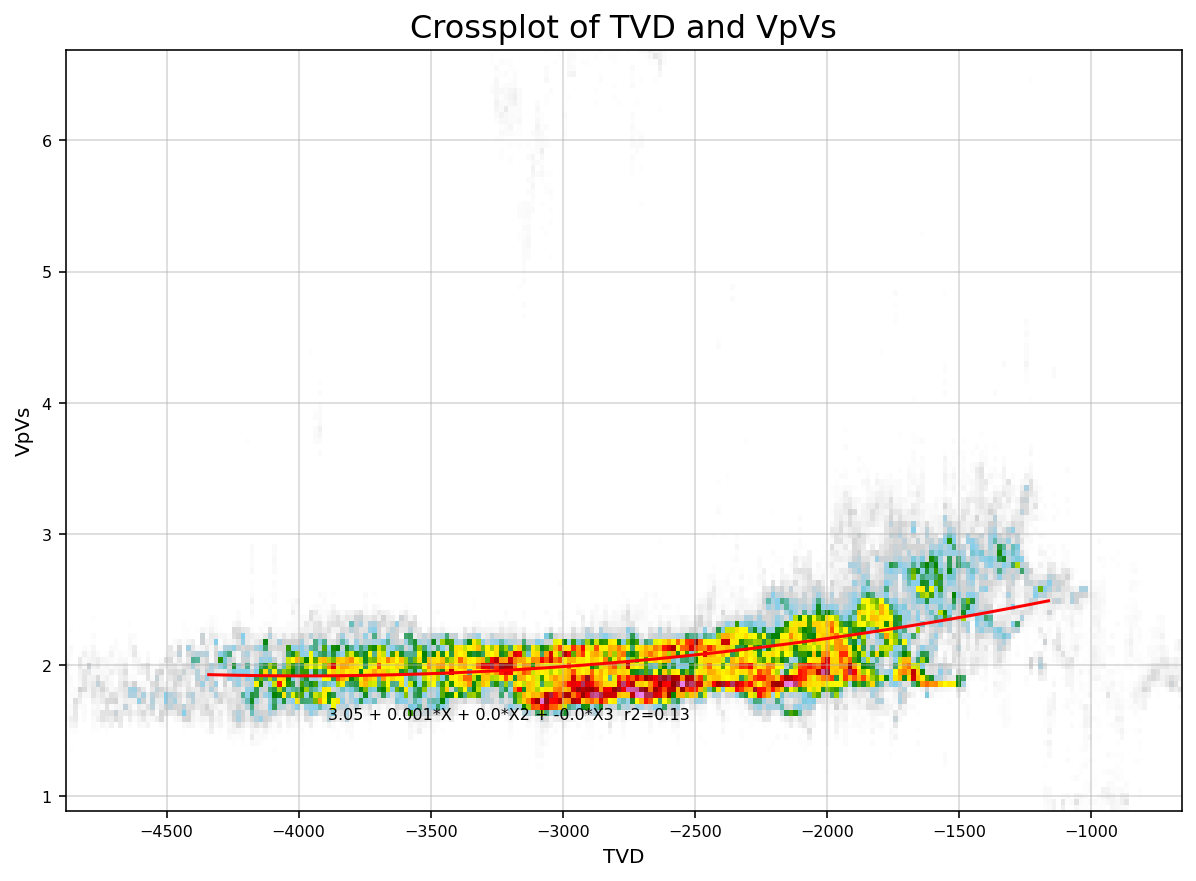

In [ ]:
nameX = 'TVD'
nameY = 'VpVs'
log_crossplot(data[nameX],data[nameY],nameX,nameY,order=3)

### Creating residual attributes

In [ ]:
parm = dptrend(data.TVD,data.GR,1)
print('GR:   intercept',round(float(parm[0]),2),'slope',round(float(parm[1]),4),'r2',round(parm[2],3))
data['GR_RES'] = data['GR'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.RDEP,1)
print('RDEP: intercept',round(float(parm[0]),3),'slope',round(float(parm[1]),6),'r2',round(parm[2],3))
data['RDEP_RES'] = data['RDEP'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))
data['RMED_RES'] = data['RMED'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))
data['RSHA_RES'] = data['RSHA'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))
 
parm = dptrend(data.TVD,data.NPHI,1)
print('NPHI: intercept',round(float(parm[0]),3),'slope',round(float(parm[1]),7),'r2',round(parm[2],3))
data['NPHI_RES'] = data['NPHI'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.RHOB,1)
print('RHOB: intercept',round(float(parm[0]),2),'slope',round(float(parm[1]),5),'r2',round(parm[2],3))
data['RHOB_RES'] = data['RHOB'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,1 - (data['RHOB'] - 1)/(2.72 - 1),1)
print('DPHI: intercept',round(float(parm[0]),2),'slope',round(float(parm[1]),5),'r2',round(parm[2],3))

parm = dptrend(data.TVD,data.DTC,1)
print('DTC:  intercept',round(float(parm[0]),1),'slope',round(float(parm[1]),4),'r2',round(parm[2],3))
print(1000000 / (3.2808 * parm[0]))
data['DTC_RES'] = data['DTC'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.Vp,1)
print('Vp:   intercept',round(float(parm[0]),1),'slope',round(float(parm[1]),4),'r2',round(parm[2],3))
data['Vp_RES'] = data['Vp'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.DTS,1)
print('DTS:  intercept',round(float(parm[0]),1),'slope',round(float(parm[1]),4),'r2',round(parm[2],3))
print(1000000 / (3.2808 * parm[0]))
data['DTS_RES'] = data['DTS'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.Vs,1)
print('Vs:   intercept',round(float(parm[0]),1),'slope',round(float(parm[1]),4),'r2',round(parm[2],3))
data['Vs_RES'] = data['Vs'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.VpVs,1)
print('Vp/Vs:   intercept',round(float(parm[0]),1),'slope',round(float(parm[1]),4),'r2',round(parm[2],3))
data['VpVs_RES'] = data['Vs'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))

parm = dptrend(data.TVD,data.PEF,1)
print('PEF:  intercept',round(float(parm[0]),2),'slope',round(float(parm[1]),8),'r2',round(parm[2],3))
data['PEF_RES'] = data['PEF'] - (float(parm[0]) + (float(parm[1]) * data['TVD']))


GR:   intercept 61.85 slope -0.0025 r2 0.006
RDEP: intercept -0.161 slope -0.000192 r2 0.168
NPHI: intercept 0.506 slope 7.46e-05 r2 0.307
RHOB: intercept 1.86 slope -0.00019 r2 0.556
DPHI: intercept 0.5 slope 0.00011 r2 0.556
DTC:  intercept 165.7 slope 0.0239 r2 0.56
[1839.05856294]
Vp:   intercept 1588.3 slope -0.6 r2 0.482
DTS:  intercept 349.1 slope 0.0514 r2 0.287
[873.04527489]
Vs:   intercept 847.1 slope -0.2871 r2 0.257
Vp/Vs:   intercept 2.6 slope 0.0002 r2 0.11
PEF:  intercept 3.35 slope -0.00038642 r2 0.079


Remove any residual shift from the residual using the median

In [ ]:
Curves = ['GR_RES','RDEP_RES','RMED_RES','RSHA_RES','NPHI_RES','RHOB_RES','Vp_RES','DTC_RES','Vs_RES','DTC_RES','VpVs_RES','PEF_RES']
for well in Wells:
  for curve in Curves:
    data[curve][data[data.WELL == well].TVD.index] = data[curve][data.WELL == well] - np.nanmedian(data[curve][data.WELL == well])

###Residual outlier removal
Remove points that are outside expected data range.

In [ ]:
data.BAD[data.GR_RES[data.GR_RES >= 200   ].index] += 1
data.BAD[data.GR_RES[data.GR_RES <= -200   ].index] += 1
data.BAD[data.RDEP_RES[data.RDEP_RES >= 4].index] += 1
data.BAD[data.RDEP_RES[data.RDEP_RES <= -3].index] += 1
data.BAD[data.NPHI_RES[data.NPHI_RES >= 0.5 ].index] += 1
data.BAD[data.NPHI_RES[data.NPHI_RES <= -0.4  ].index] += 1
data.BAD[data.RHOB_RES[data.RHOB_RES >= 2.5 ].index] += 1
data.BAD[data.RHOB_RES[data.RHOB_RES <= -2.5 ].index] += 1
data.BAD[data.Vp_RES[data.Vp_RES >= 3000 ].index] += 1
data.BAD[data.Vp_RES[data.Vp_RES <= -2500  ].index] += 1
data.BAD[data.Vs_RES[data.Vs_RES >= 2000 ].index] += 1
data.BAD[data.Vs_RES[data.Vs_RES <= -1500].index] += 1 
data.BAD.sum()

27227

In [ ]:
data.GR_RES[data.GR_RES >= 200 ] = 200     # GR 150 for a 100% clay
data.GR_RES[data.GR_RES <= -200 ] = -200      # GR <0 not possible
data.RDEP_RES[data.RDEP_RES >= 4] = np.nan  # Should not exist if correctly log scaled
data.RDEP_RES[data.RDEP_RES <= -3] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RMED_RES[data.RMED_RES >= 4] = np.nan  # Should not exist if correctly log scaled
data.RMED_RES[data.RMED_RES <= -3] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RSHA_RES[data.RSHA_RES >= 4] = np.nan  # Should not exist if correctly log scaled
data.RSHA_RES[data.RSHA_RES <= -3] = np.nan  # Would indicate steel or another non-sedimentary mineral
data.RHOB_RES[data.RHOB_RES >= 2 ] = np.nan  # Density above 4 unlikely to exist in sedimentary rocks
data.RHOB_RES[data.RHOB_RES <= -2 ] = np.nan  # Density less than water should not exist
data.PEF_RES[data.PEF_RES >= 4   ] = np.nan  # Should not exist if correctly scaled
data.PEF_RES[data.PEF_RES <= -4 ] = np.nan  # Should not exist if correctly scaled
data.Vp_RES[data.Vp_RES >= 3000 ] = np.nan  # Should not exist as 250 = 1220 m/sec < water
data.Vp_RES[data.Vp_RES <= -2500  ] = np.nan  # Should not exist as 35 = 8700 m/sec > all sedimentary rocks
data.Vs_RES[data.Vs_RES >= 2000 ] = np.nan  # Unlikely shear velocity < 500 m/s
data.Vs_RES[data.Vs_RES <= -1500  ] = np.nan  # Unlikely shear velocity > 5000 m/s       
data.NPHI_RES[data.NPHI_RES >= .4 ] = np.nan  # Unlikely porosity reading even for shales
data.NPHI_RES[data.NPHI_RES <= -.4  ] = np.nan  # Physically impossible porosity 

## Normalized Logs
by adding back in the trend


In [ ]:
print('Create Normalized logs from Residual curves')
data.GR = data.GR_RES + (62 - 0.0025 * data.TVD)

data.RDEP = data.RDEP_RES + (-0.116 - 0.000192 * data.TVD)
data.RMED = data.RMED_RES + (-0.116 - 0.000192 * data.TVD)
data.RSHA = data.RSHA_RES + (-0.116 - 0.000192 * data.TVD)

data.NPHI = data.NPHI_RES + (0.505 + 0.0000744 * data.TVD)
data.RHOB = data.RHOB_RES + (1.86 - 0.00019 * data.TVD)
data.DPHI = data.RHOB_RES + (0.5 - 0.00011 * data.TVD)

data.Vp = data.Vp_RES + (1588 - 0.60 * data.TVD)
data.Vs = data.Vs_RES + (847 - 0.287 * data.TVD)
data.VpVs = data.VpVs_RES + (2.6 + 0.0002 * data.TVD)

data.DTC = 1000000/(3.2808*data.Vp)
data.DTS = 1000000/(3.2808*data.Vs)

data.PEF = data.PEF_RES + (3.35 - 0.00038642 * data.TVD)

Create Normalized logs from Residual curves


### SP log standarization

In [ ]:
print('Rescaling SP by subtracting medium and scaling using STD')
from scipy.signal import medfilt
data['SP_N'] = data.SP
for well in Wells:
    data.SP_N[data[data.WELL == well].SP_N.index] = data[data.WELL == well].SP_N - medfilt(data[data.WELL == well].SP_N,151)
    data.SP[data[data.WELL == well].SP.index] = 3 * data[data.WELL == well].SP_N / np.nanstd(data[data.WELL == well].SP_N)
    
data.drop(columns=['SP_N'],inplace=True)

data.SP[data.SP >= 30 ] = 30  # Unlikely porosity reading even for shales
data.SP[data.SP <= -30  ] = -30  # Physically impossible porosity 

Rescaling SP by subtracting medium and scaling using STD


###Borehole size (BS)

Estimate BS from CALI


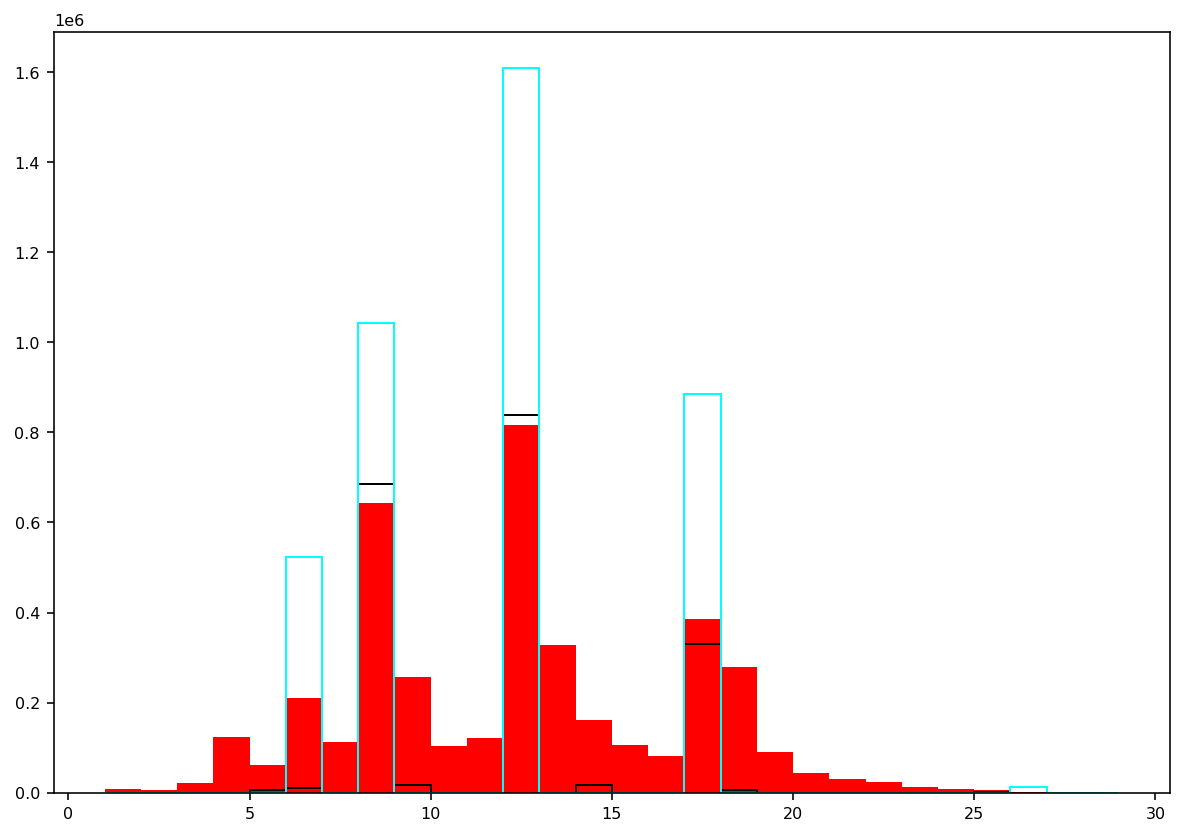

In [ ]:
from scipy.signal import medfilt
print('Estimate BS from CALI')
plt.hist(data.CALI,bins=range(1,30,1),color='red')
plt.hist(data.BS,bins=range(1,30,1),histtype='step',alpha=1,color='black')

data['BS_CALI'] = data['CALI']
for well in Wells:
    data.BS_CALI[data.BS_CALI[data.WELL == well].index] = medfilt(data[data.WELL == well].BS_CALI, 501)
data.BS_CALI[data.BS_CALI <= 7.5] = 6.0
data.BS_CALI[(data.BS_CALI >= 7.5) & (data.BS_CALI <= 10.5)] = 8.5
#data.BS_CALI[(data.CALI >= 8.87) & (data.CALI <= 10.5)] = 9.25
data.BS_CALI[(data.BS_CALI >= 10.5) & (data.BS_CALI <= 16.5)] = 12.25
#data.BS_CALI[(data.CALI >= 14.25) & (data.CALI <= 16.5)] = 15
data.BS_CALI[(data.BS_CALI >= 16.5) & (data.BS_CALI <= 24)] = 17.5
#data.BS_CALI[(data.CALI >= 20.5) & (data.CALI <= 24)] = 22
data.BS_CALI[data.BS_CALI >= 24] = 26.0

plt.hist(data.BS_CALI,bins=range(1,30,1),histtype='step',alpha=1,color='cyan');

Check for extreme washout using a 101 unit medium filter

In [ ]:
print("File BS with estimate from CALI and filter to smooth estimate")
data.BS.fillna(data.BS_CALI, inplace=True)
i = 0
for well in Wells:
  data.BS[data.BS[data.WELL == well].index] = medfilt(data[data.WELL == well].BS, 101)
  i += 1

File BS with estimate from CALI and filter to smooth estimate


Flag point the BS changes

In [ ]:
data['Change'] = data.DEPTH - data.DEPTH.shift(-1)
data['Change'] = np.abs(data['Change'])
print('The average depth interval is ',np.nanmedian(data.Change))
data['Change2'] = data.DEPTH - data.DEPTH.shift(1)
data['Change2'] = np.abs(data['Change2'])
data['Change'] = data['Change'] + data['Change2']
data['BAD'][data[data.Change >= 2].Change.index] += 1
data['BAD'][data[data.Change >= 5].Change.index] += 2
data['BAD'][data[data.Change >= 10].Change.index] += 3
data.drop(columns=['Change','Change2'],inplace=True)
data.BAD.sum()

The average depth interval is  0.125


29800

###Create Filter Cake curve

In [ ]:
data['FCAKE'] = data['CALI'] -  data['BS']

Estimate washout location

In [ ]:
data['BAD'][data[data.FCAKE <= -3].BAD.index] += 1
data['BAD'][data[data.FCAKE >= 5].BAD.index] += 1
data['BAD'][data[data.FCAKE >= 10].BAD.index] += 1
data['BAD'][data[data.FCAKE >= 15].BAD.index] += 1
data.BAD.sum()

779781

###Remove non-sedimentary values

In [ ]:
data.GR[data.GR >= 250   ] = 250     # GR 150 for a 100% clay
data.GR[data.GR <= 0     ] = 0       # GR <0 not possible
data.RHOB[data.RHOB >= 3.2 ] = np.nan  # Density above 4 unlikely to exist in sedimentary rocks
data.RHOB[data.RHOB <= 1 ] = np.nan  # Density less than water should not exist
data.PEF[data.PEF >= 8   ] = np.nan  # Should not exist if correctly scaled
data.PEF[data.PEF <= 0.1 ] = np.nan  # Should not exist if correctly scaled
data.DTC[data.DTC >= 300 ] = np.nan  # Should not exist as 250 = 1220 m/sec < water
data.DTC[data.DTC <= 35  ] = np.nan  # Should not exist as 35 = 8700 m/sec > all sedimentary rocks
data.DTS[data.DTS >= 650 ] = np.nan  # Unlikely shear velocity < 500 m/s
data.DTS[data.DTS <= 65  ] = np.nan  # Unlikely shear velocity > 5000 m/s   
data.Vp[data.Vp >= 7000 ] = np.nan  # Should not exist as 250 = 1220 m/sec < water
data.Vp[data.Vp <= 1450  ] = np.nan  # Should not exist as 35 = 8700 m/sec > all sedimentary rocks
data.Vs[data.Vs >= 3500 ] = np.nan  # Unlikely shear velocity > 3500 m/s
data.Vs[data.Vs <= 300  ] = np.nan  # Unlikely shear velocity < 500 m/s       
data.NPHI[data.NPHI >= 0.8 ] = np.nan  # Unlikely porosity reading even for shales
data.NPHI[data.NPHI <= -0.1  ] = np.nan  # Physically impossible porosity 

## Create Petrophysical Attributes

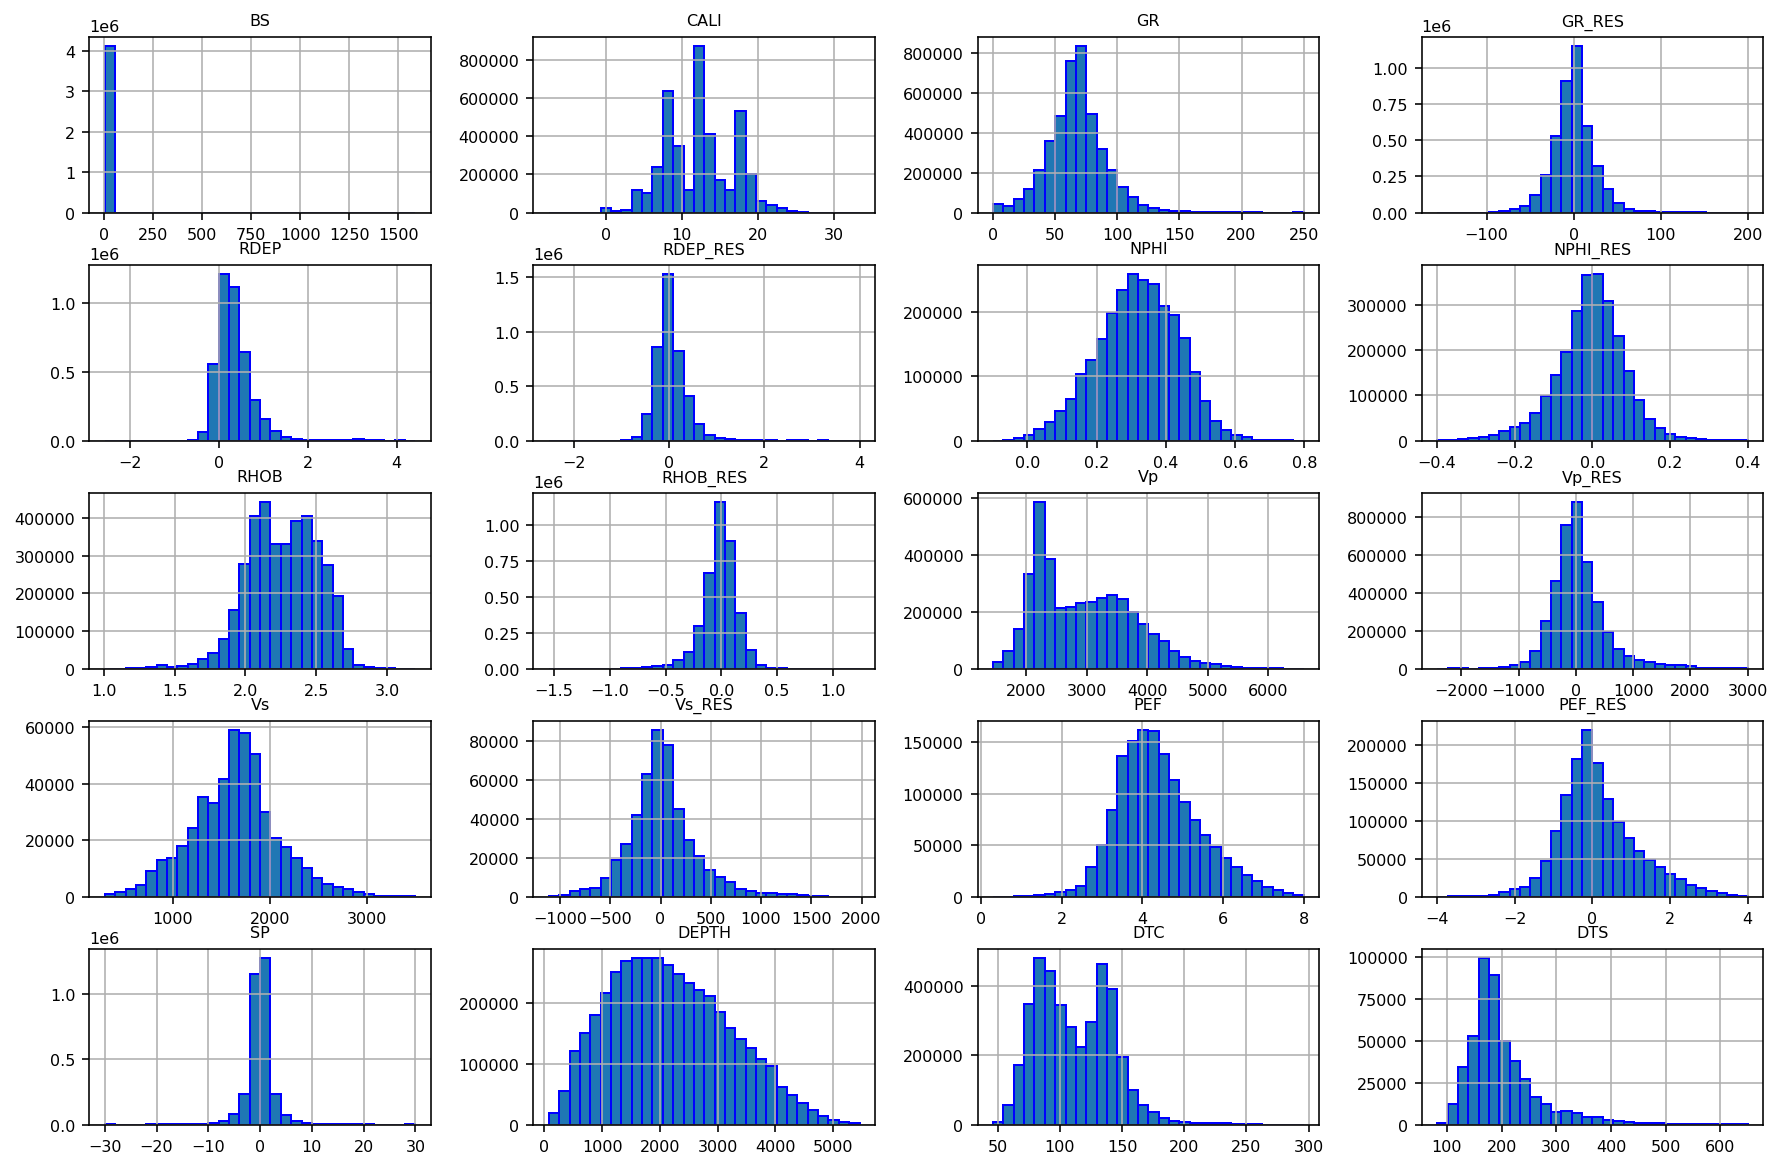

In [ ]:
Features = ['BS','CALI','GR','GR_RES','RDEP','RDEP_RES','NPHI','NPHI_RES',
            'RHOB','RHOB_RES','Vp','Vp_RES','Vs','Vs_RES','PEF','PEF_RES','SP', 'DEPTH', 'DTC','DTS'
            ]
data[Features].hist(bins=30,figsize=(15,10),edgecolor='b')
plt.show;

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
density_colors = ['white', 'lightgrey', 'skyblue', 'green', 'yellow', 'gold', 'darkorange', 'red', 'DarkRed', 'violet']
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('wbgr', density_colors))
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('wbgr_trans', density_colors, gamma=np.linspace(1, 0, 256)))

# Colour map for displaying GR from yellow to grey 
gammaray_colors = ['salmon','yellow', 'lightgreen','lightgrey', 'silver','gray','slategrey']
plt.register_cmap(cmap=LinearSegmentedColormap.from_list('gr_color', gammaray_colors))

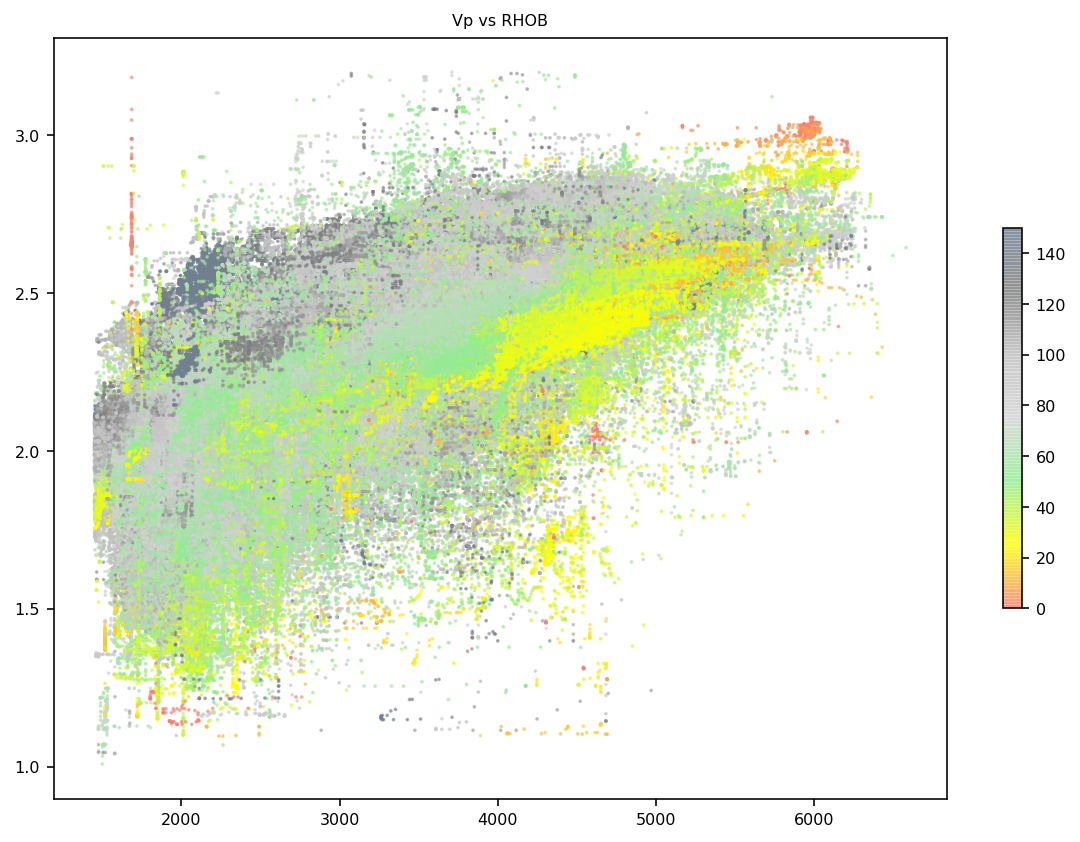

In [ ]:
plt.scatter(data.Vp,data.RHOB,c=data.GR,cmap='gr_color',s=0.75, alpha=0.6, vmin=0, vmax=150)
plt.colorbar(shrink=0.5)
plt.title('Vp vs RHOB');

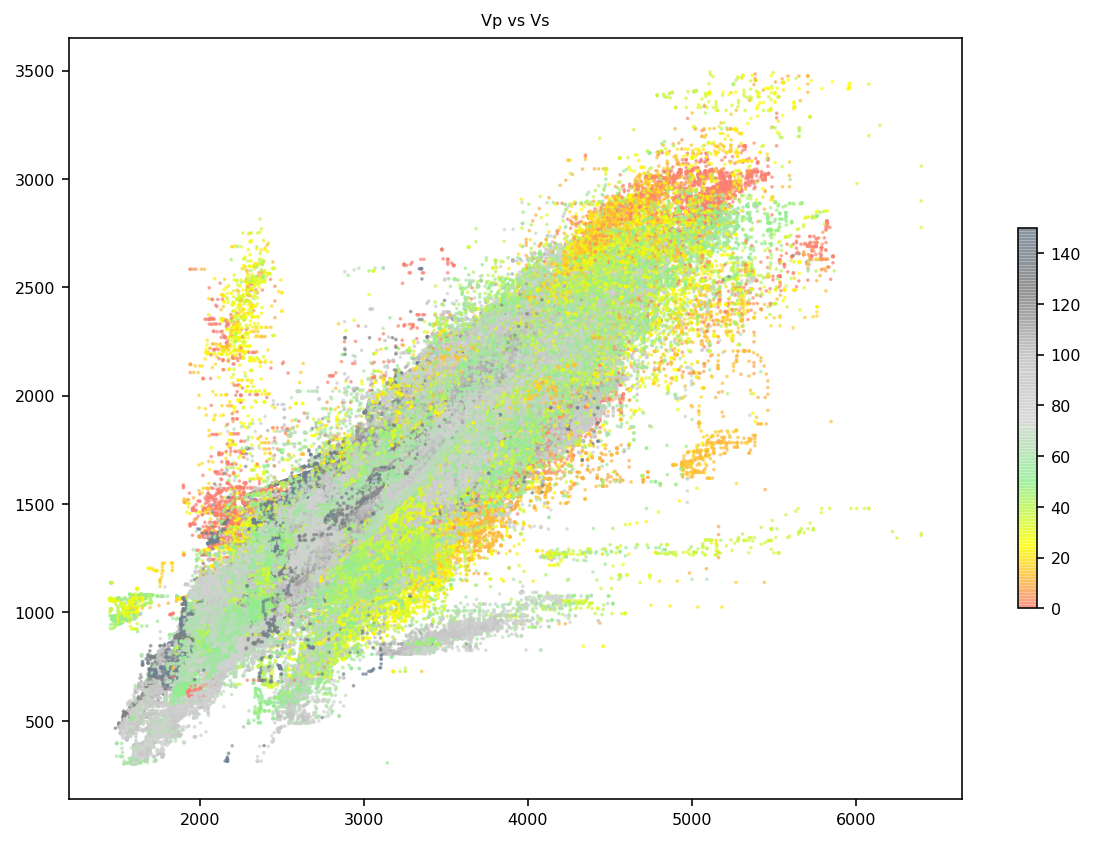

In [ ]:
plt.scatter(data.Vp,data.Vs,c=data.GR,cmap='gr_color',s=0.75, alpha=0.6, vmin=0, vmax=150)
plt.colorbar(shrink=0.5)
plt.title('Vp vs Vs');

### Density Porosity (DPHI)

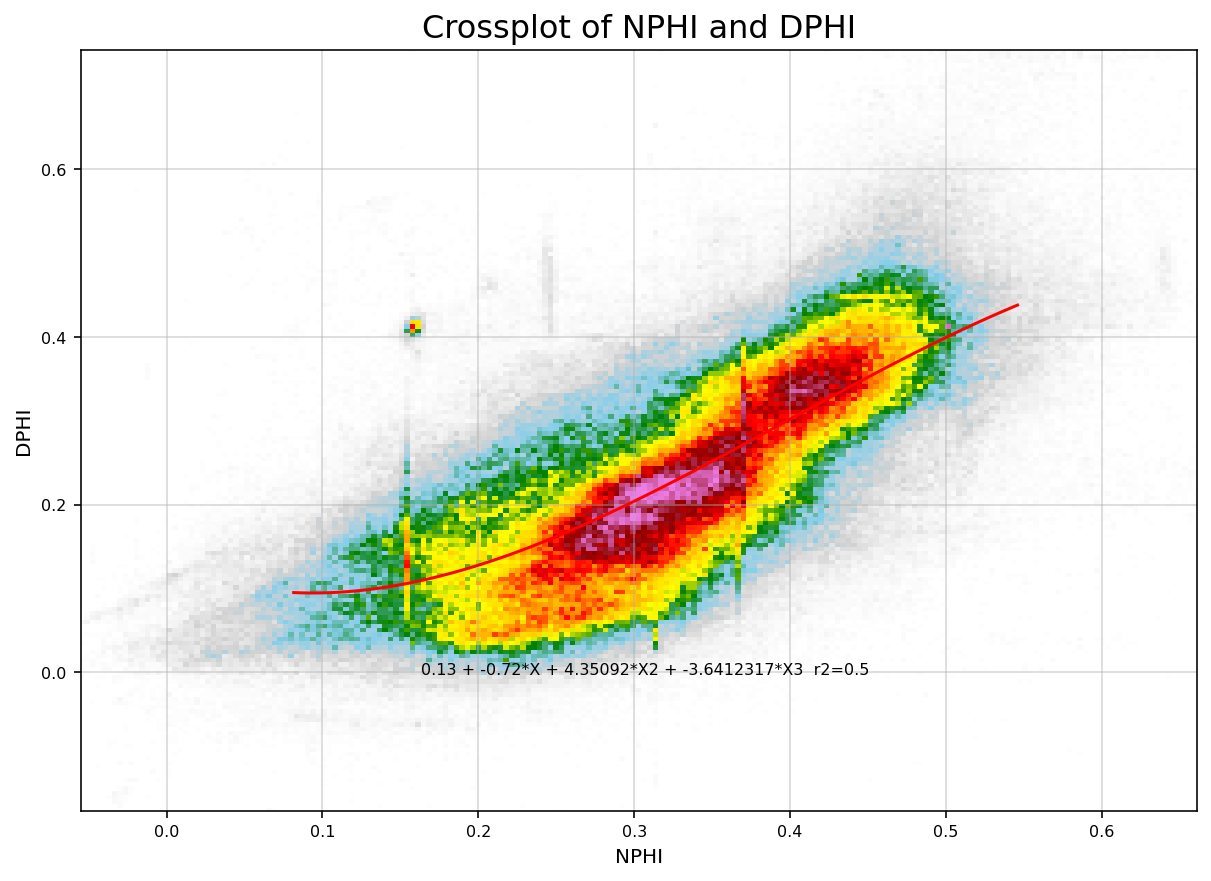

In [ ]:
data['DPHI'] = 1 - (data['RHOB'] - 1)/(2.72 - 1)
data.DPHI[data.DPHI >= 0.8 ] = np.nan  # Unlikely porosity reading even for shales
data.DPHI[data.DPHI <= -0.1  ] = np.nan  # Physically impossible porosity

data['DPHI_RES'] = data['RHOB_RES']*1/1.7
nameX = 'NPHI'
nameY = 'DPHI'
log_crossplot(data[nameX],data[nameY],nameX,nameY,order=3)

### Neutran-Density crossover (NPHI-DPHI)

In [ ]:
data['NPHI-DPHI'] = data['DPHI'] - data['NPHI'] 

###Create Resistivity crossover

In [ ]:
data["RESdiff"] = data.RDEP_RES[data.RMED_RES != np.nan] - data.RMED_RES
# use Shallow Resisitivity if medium not available.
data.RESdiff[(data.RSHA_RES != np.nan) & (data.RESdiff == np.nan)] = data.RDEP_RES - data.RSHA_RES

Duplicate LITHOLOGY_GEOLINK

items = ['WELL','DEPTH']
data = data.sort_values(items,ignore_index=True)

item = 'LITHOLOGY_GEOLINK'
data[item].describe()

data[item][(data[item].isnull()) & (data['DEPTH'] == data['DEPTH'].shift(1))] = data[item].shift(1)
data[item][(data[item].isnull()) & (data['DEPTH'] == data['DEPTH'].shift(-1))] = data[item].shift(-1)
data[item][(data[item].isnull()) & (data['DEPTH'] == data['DEPTH'].shift(2))] = data[item].shift(2)
data[item][(data[item].isnull()) & (data['DEPTH'] == data['DEPTH'].shift(-2))] = data[item].shift(-2)
data[item][(data[item].isnull()) & (data['DEPTH'] == data['DEPTH'].shift(3))] = data[item].shift(3)
data[item][(data[item].isnull()) & (data['DEPTH'] == data['DEPTH'].shift(-3))] = data[item].shift(-3)
data[item].describe()

###Convert resistivity back to ohm.m

In [ ]:
data.RDEP = np.power(10,data.RDEP)
data.RMED = np.power(10,data.RMED)
data.RSHA = np.power(10,data.RSHA)

### Save data after feature engineering

In [ ]:
# Export data prior to analysis but after scaling
print('data saved to directory ')
df = pd.DataFrame(data)

nameout = filename.replace(".csv","")

df.to_csv(nameout + '_FE.csv' , sep=';', index=False)

data saved to directory 
